# Tiled Random Samples Histograms

This example shows tiled plots of random samples generated by various ``numpy.random`` functions.

In [1]:
import numpy as np
import scipp as sc
import plopp as pp
from typing import Callable

In [2]:
# Random sample generaters and arguments.

pdf_maps = {
    np.random.uniform: {'low': [0], 'high': [0.5, 1, 2]},
    np.random.normal: {'loc': [0], 'scale': [0.5, 1, 2]},
    np.random.gumbel: {'loc': [0], 'scale': [0.5, 1, 2]},
    np.random.laplace: {'loc': [0], 'scale': [0.5, 1, 2]},
    np.random.gamma: {'shape': [1, 2, 4], 'scale': [1]},
    np.random.beta: {'a': [1, 2], 'b': [1, 2]},
    np.random.chisquare: {'df': [0.1, 1, 2]},
    np.random.poisson: {'lam': [1, 2, 3]},
    np.random.binomial: {'n': [1, 2, 3, 4, 5], 'p': [0.5, 0.5]},
    np.random.logseries: {'p': [0.25, 0.5, 0.75]},
    np.random.pareto: {'a': [16, 24, 32]},
    np.random.geometric: {'p': [0.5, 0.7, 0.9]},
    np.random.power: {'a': [1, 2, 4]},
    np.random.triangular: {'left': [0], 'right': [1], 'mode': [0.2, 0.4, 0.8]},
    np.random.vonmises: {'mu': [0], 'kappa': [1, 2, 4]},
    np.random.exponential: {'scale': [1, 2, 3]},
    np.random.wald: {'mean': [1], 'scale': [16, 32, 64]},
    np.random.weibull: {'a': [2, 4, 8, 16]},
    np.random.f: {'dfnum': [100], 'dfden': [100]},
    np.random.rayleigh: {'scale': [2, 3, 4]}
}

def generate_kwargs(arguments_map: dict[str, list]):
    from itertools import product

    key_arg_pairs = [[(key, val) for val in values] for key, values in arguments_map.items()]
    for arguments in product(*key_arg_pairs):
        yield {str(args[0]): args[1] for args in arguments}

def key_arg_name(key: str, arg) -> str:
    return ": ".join([key, str(arg)])

def keys_args_name(**kwargs) -> str:
    return ",".join([key_arg_name(key, arg) for key, arg in kwargs.items()])


In [4]:
# Collect samples
def sample_and_hist(pdf: Callable, size: int, **kwargs):
    samples = sc.array(dims=['event'], values=pdf(size=size, **kwargs), unit='1')
    
    return samples.hist(event=10)/len(samples)

plots = dict()

for pdf, arguments_map in pdf_maps.items():
    hists = {
        keys_args_name(**kwargs): sample_and_hist(pdf, size=10_000, **kwargs)
        for kwargs in generate_kwargs(arguments_map)    
    }
    plot = pp.plot(hists, title=f"{pdf.__name__} distribution", alpha=0.8, linewidth=4)
    plots[pdf.__name__] = plot


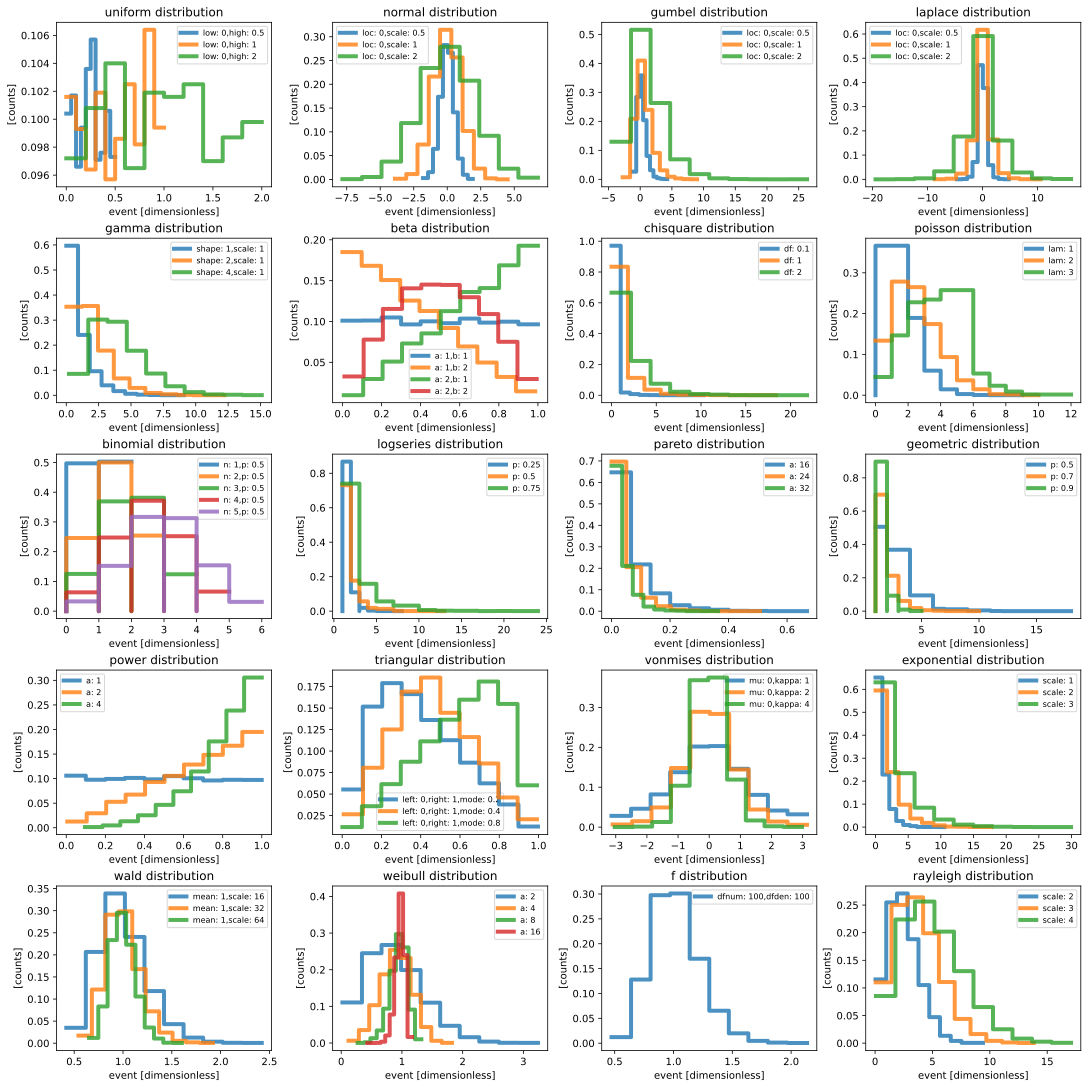

In [5]:
# Show all samples
tiled = pp.tiled(5, 4)
plot_table = np.array(list(plots.values())).reshape((5, 4))
for i_row in range(5):
    for i_col in range(4):
        tiled[i_row, i_col] = plot_table[i_row][i_col]
        tiled[i_row, i_col].ax.legend(fontsize=8)

tiled

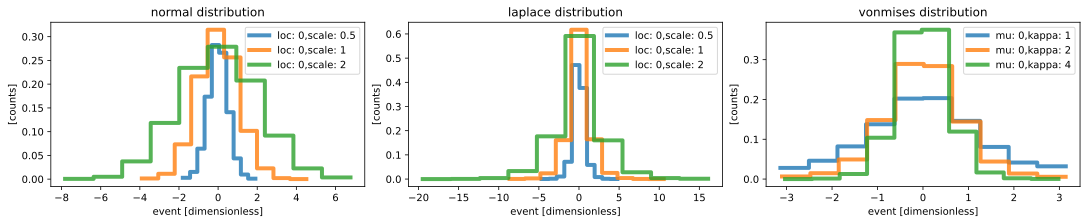

In [6]:
# Continuous samples
continuous_samples = plots['normal'] + plots['laplace'] + plots['vonmises']
continuous_samples.fig.set_size_inches((15, 3))
continuous_samples

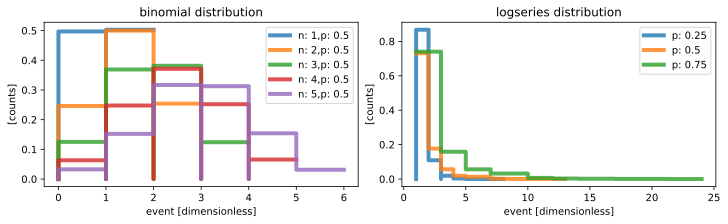

In [7]:
# Discrete samples
discrete_samples = plots['binomial'] + plots['logseries']
discrete_samples.fig.set_size_inches((10, 3))
discrete_samples